In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import matplotlib.font_manager as fm

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [3]:

plt.rc('font', family='NanumBarunGothic')
font_location = 'C:/Windows/Fonts/MALGUNSL.TTF'  # for windows
font_name = fm.FontProperties(fname=font_location).get_name()
plt.rc('font', family=font_name)


In [4]:
%matplotlib inline
import matplotlib as mpl
mpl.rc('axes',labelsize = 20)
mpl.rc('xtick',labelsize = 20)
mpl.rc('ytick',labelsize = 20)

UsageError: unrecognized arguments: # 그래프 label 설정


# 데이터 불러오기 및 저장 코드

In [5]:
df = pd.read_csv(r'C:\Users\yoon9\PycharmProjects\Sejong_Project\Numble\data\company_info(전체).csv')
df

,사업자등록번호,기업명,공기업구분,개인법인구분,본점지점구분,국외투자법인여부,벤처기업여부,상장코드,산업코드1,공공기관유형,중견기업보호여부,본점기업코드,설립일자,설립구분,국가명,직원수,폐업여부,산업코드 대분류
0,1138111739,한일가스산업,2,1,1,0,0,0,47,0,0,0,1966-04-19,1,0,43.0,0,도매 및 소매업
1,2078132193,엠피아이,2,1,1,0,0,0,15,0,0,0,1991-08-06,1,0,35.0,0,제조업
2,1318167565,도영운수,2,1,1,0,0,0,49,0,0,0,2001-10-30,1,0,149.0,0,운수 및 창고업
3,5048128251,중원산업,2,1,1,0,0,0,30,0,0,0,1999-01-12,1,0,75.0,0,제조업
4,1098164260,카타나골프,2,1,1,0,0,0,46,0,0,0,2000-05-31,1,0,3.0,0,도매 및 소매업
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35716,4808501629,게방식당팩토리,2,1,2,0,0,0,10,0,0,1,2018-01-26,1,0,0.0,1,제조업
35717,8018501578,우진푸드중부지점,2,1,2,0,0,0,10,0,0,1,2020-07-27,1,0,22.0,1,제조업
35718,4118523419,윤월드푸드코리아다크써클브로스,2,1,2,0,0,0,56,0,0,1,2019-09-26,1,0,0.0,1,숙박 및 음식점업
35719,1738102533,기린테크,2,1,1,0,0,0,58,0,0,0,2021-10-25,1,0,0.0,1,정보통신업


In [8]:
import os

# 그림을 저장할 위치
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "Numble"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("그림 저장:", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [9]:
import matplotlib.font_manager as fm

plt.rc('font', family='NanumBarunGothic')
font_location = 'C:/Windows/Fonts/MALGUNSL.TTF'  # for windows
font_name = fm.FontProperties(fname=font_location).get_name()
plt.rc('font', family=font_name)

# 휴폐업 ,액티브 중소법인 재무 보유 데이터 비교 EDA

In [10]:
# EDA 전 columns name 변경해주도록 하겠습니다.

df = df.rename(columns= {'BIZ_NO':'사업자등록번호', 'CMP_PFIX_NM':'기업접두명', 'CMP_NM1':'기업명', 'CMP_SFIX_NM':'기업접미명', 'CMP_ENM':'기업영문명', 'BZ_TYP':'업종','CMP_SCL':'기업규모', 'PBCO_GB':'공기업구분',
                           'PSN_CORP_GB':'개인법인구분', 'HDOF_BR_GB':'본점지점구분', 'FR_IVST_CORP_YN':'국외투자법인여부', 'VENT_YN':'벤처기업여부', 'LIST_CD':'상장코드', 'IND_CD_ORDR':'산업코드차수', 'IND_CD1':'산업코드1', 'IND_CD2':'산업코드2', 'IND_CD3':'산업코드3','PB_ORG_TYP':'공공기관유형', 'MDSCO_PRTC_YN':'중견기업보호여부', 'HDOF_CMP_CD':'본점기업코드', 'ESTB_DATE':'설립일자', 'ESTB_GB':'설립구분', 'LIST_DATE':'상장일자', 'MN_BIZ_CONT':'주요사업내용', 'NATN_NM':'국가명', 'HOMEPAGE_URL':'홈페이지URL', 'CEO_NM':'대표자명','EMP_CNT':'직원수'})

# ['BIZ_NO', 'CMP_PFIX_NM', 'CMP_NM1', 'CMP_SFIX_NM', 'CMP_ENM', 'BZ_TYP','CMP_SCL', 'PBCO_GB', 'PSN_CORP_GB', 'HDOF_BR_GB', 'FR_IVST_CORP_YN',
# 'VENT_YN', 'LIST_CD', 'IND_CD_ORDR', 'IND_CD1', 'IND_CD2', 'IND_CD3','PB_ORG_TYP', 'MDSCO_PRTC_YN', 'HDOF_CMP_CD', 'ESTB_DATE', 'ESTB_GB',
# 'LIST_DATE', 'MN_BIZ_CONT', 'NATN_NM', 'HOMEPAGE_URL', 'CEO_NM','EMP_CNT']
#
# '사업자등록번호','기업접두명', '기업명',/'기업접미명', /'기업영문명', /'업종',/ '기업규모',/ '공기업구분', '개인법인구분', '본점지점구분', '국외투자법인여부', '벤처기업여부', '상장코드', '산업코드차수', '산업코드1', '산업코드2', '산업코드3', '공공기관유형', '중견기업보호여부', '본점기업코드', '설립일자', '설립구분', '상장일자', '주요사업내용', '국가명', '홈페이지URL', '대표자명', '직원수'


필요 X : 기업규모 , 개인법인 구분 산업코드차수 (전부 같은 값이다)

### 업종

A : 신금(신용금고) -> 중소기업과 국민대중을 위한 자금을 융통하며 저축의 증대를 목적으로 하는 비영리적 조합조직에 의한 금융기관
B : 은행
C : 카드
F : 생보(생명보험) -> 보험사고 발생 객체가 피보험자의 생명 혹은 신체
I : 손보(손해보험) -> 보험사고 발생 객체가 피보험자의 재산
M : 제조
O : 기타금융
S : 증권
V : 창투(창업투자회사) -> 창의성과 사업성은 있으나 자금력이 부족한 창업자에게 투자 형태로 지원하는 벤처캐피털


In [11]:
plt.figure(figsize=(15,12))
sns.countplot(data = df,x='업종')
plt.title('업종 count', fontsize=20)
plt.xlabel('업종', fontsize=16)
plt.ylabel('개수', fontsize=16)
save_fig("업종_countplot")
plt.show()

ValueError: Could not interpret input '업종'

<Figure size 1080x864 with 0 Axes>

대략 3만개의 기업이 전부 M 인 제조업을 하는 것을 볼 수 있다.

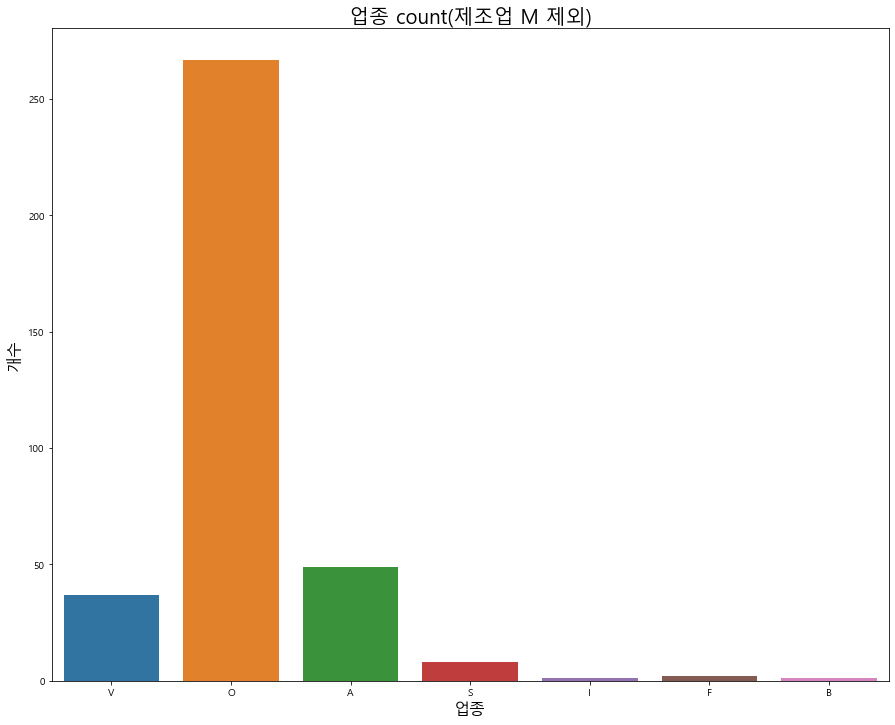

In [9]:
plt.figure(figsize=(15,12))
sns.countplot(data = df_active[df_active['업종'] != 'M'],x='업종')
plt.title('업종 count(제조업 M 제외)', fontsize=20)
plt.xlabel('업종', fontsize=16)
plt.ylabel('개수', fontsize=16)
#save_fig("업종_countplot_drop(M)")
plt.show()

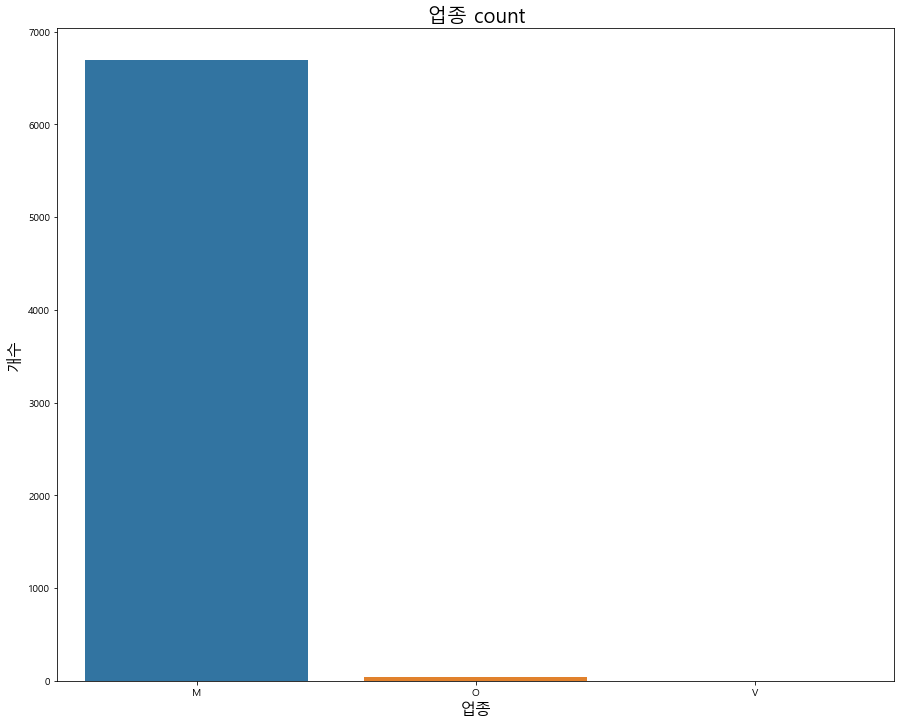

In [10]:
plt.figure(figsize=(15,12))
sns.countplot(data = df_down,x='업종')
plt.title('업종 count', fontsize=20)
plt.xlabel('업종', fontsize=16)
plt.ylabel('개수', fontsize=16)
#save_fig("업종_countplot")
plt.show()

액티브 데이터 와는 다르게 휴폐업의 데이터의 경우 거의 대부분 제조업이고 업종도 3가지 밖에 없다.

### 기업규모

전부 2여서 없애도 됌

In [10]:
df_active['기업규모'].value_counts()

# plt.figure(figsize=(15,12))
# sns.histplot(data = df_active,x='기업규모')
# plt.title('업종 count(제조업 M 제외)', fontsize=20)
# plt.xlabel('업종', fontsize=16)
# plt.ylabel('개수', fontsize=16)
# #save_fig("업종_countplot_drop(M)")
# plt.show()

2    28982
Name: 기업규모, dtype: int64

In [11]:
df_down['기업규모'].value_counts()

2    6739
Name: 기업규모, dtype: int64

마찬가지로 휴폐업 데이터도 전부 2이다.

### 공기업 구분

In [13]:
df['공기업구분'].value_counts() # 7개를 제외한 모든 기업이 사기업인듯


# 1 : 공기업
# 2 : 사기업

# 7개 기업 제외하고 모두 공기업이다.

2    35714
1        7
Name: 공기업구분, dtype: int64

In [13]:


# 이와 대조적으로 휴폐업은 전부 2인 사기업이다. 공기업은 안망하겟짓..

2    6739
Name: 공기업구분, dtype: int64

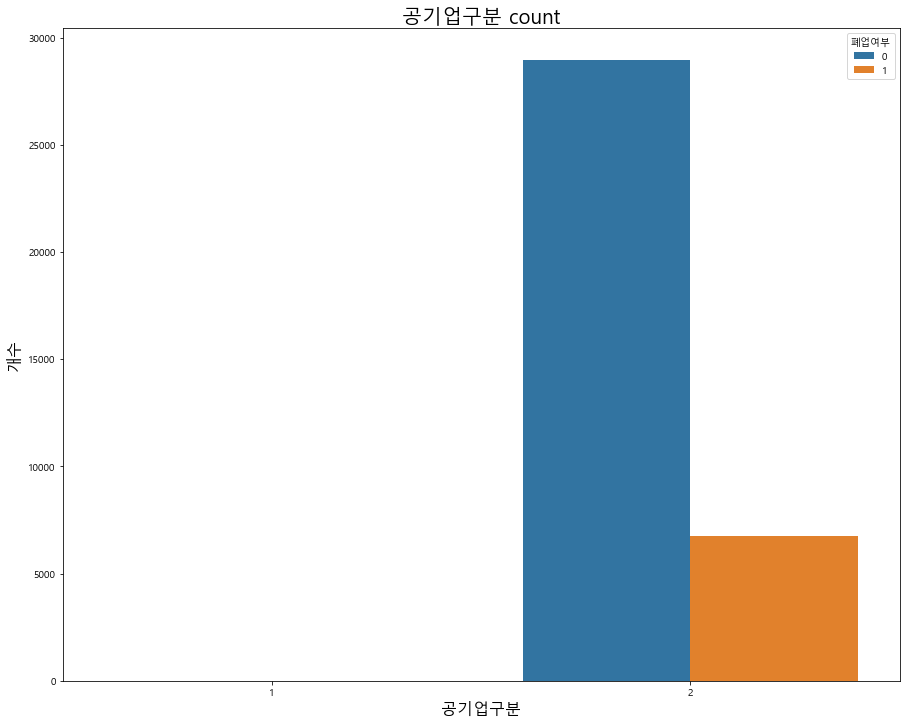

In [16]:
plt.figure(figsize=(15,12))
sns.countplot(data = df,x='공기업구분',hue='폐업 여부')
plt.title('공기업구분 count', fontsize=20)
plt.xlabel('공기업구분', fontsize=16)
plt.ylabel('개수', fontsize=16)
#save_fig("업종_countplot")
plt.show()

### 본점지점구분

In [18]:
df['본점지점구분'].value_counts()

# 1: 본점
# 2: 분점


1    31344
2     4377
Name: 본점지점구분, dtype: int64

In [15]:
df_down['본점지점구분'].value_counts()

# 1: 본점
# 2: 분점


# 휴폐업에서도 역시 5200으로 본점이 더 많긴했다..

1    5274
2    1465
Name: 본점지점구분, dtype: int64

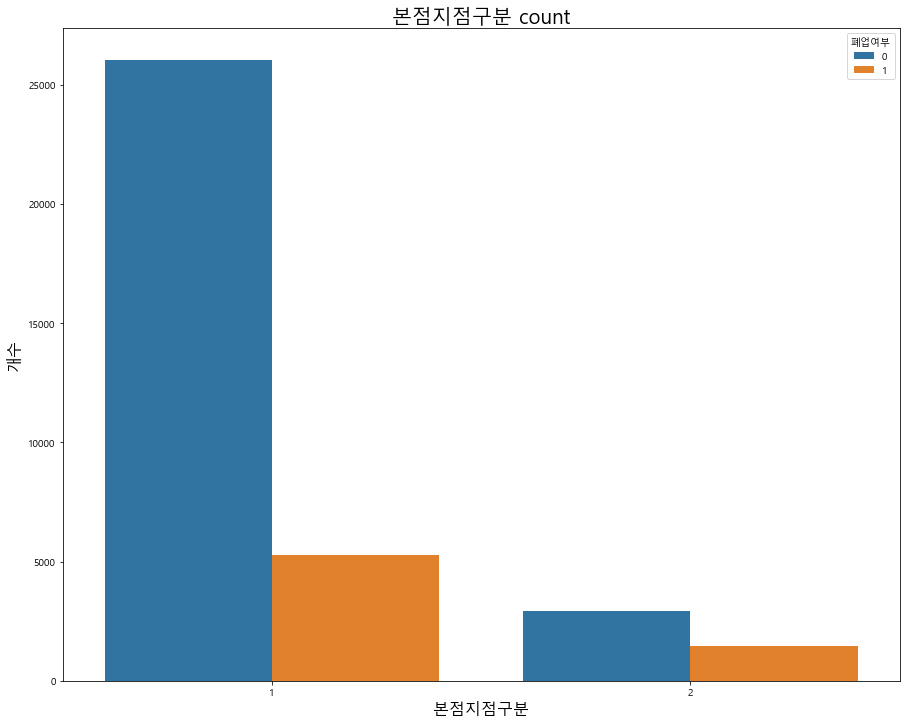

In [20]:
plt.figure(figsize=(15,12))
sns.countplot(data = df,x='본점지점구분',hue='폐업여부')
plt.title('본점지점구분 count', fontsize=20)
plt.xlabel('본점지점구분', fontsize=16)
plt.ylabel('개수', fontsize=16)
#save_fig("업종_countplot")
plt.show()

### 공기업구분, 본점지점구분, 국외투자법인여부, 벤처기업여부

In [16]:
print(df_active['공기업구분'].value_counts())
print('\n')
# 1 : 공기업
# 2 : 사기업

print(df_active['본점지점구분'].value_counts())
print('\n')
# 1: 본점
# 2: 분점

print(df_active['국외투자법인여부'].value_counts())
print('\n')

print(df_active['벤처기업여부'].value_counts())

# Y : Yes
# N : No

2    28975
1        7
Name: 공기업구분, dtype: int64


1    26070
2     2912
Name: 본점지점구분, dtype: int64


N    27347
Y     1635
Name: 국외투자법인여부, dtype: int64


N    26170
Y     2812
Name: 벤처기업여부, dtype: int64


In [17]:
print(df_down['공기업구분'].value_counts())
print('\n')
# 1 : 공기업
# 2 : 사기업

print(df_down['본점지점구분'].value_counts())
print('\n')
# 1: 본점
# 2: 분점

print(df_down['국외투자법인여부'].value_counts())
print('\n')

print(df_down['벤처기업여부'].value_counts())

# Y : Yes
# N : No

2    6739
Name: 공기업구분, dtype: int64


1    5274
2    1465
Name: 본점지점구분, dtype: int64


N    6595
Y     144
Name: 국외투자법인여부, dtype: int64


N    6507
Y     232
Name: 벤처기업여부, dtype: int64


In [1]:
plt.subplot(2,2,1)

plt.figure(figsize=(10,8))
sns.countplot(data = df,x='본점지점구분',hue='폐업여부')
plt.title('본점지점구분 count', fontsize=20)
plt.xlabel('본점지점구분', fontsize=16)
plt.ylabel('개수', fontsize=16)
#save_fig("업종_countplot")
plt.show()

NameError: name 'plt' is not defined

### 상장코드

상장할때 받는 코드로 다 각기 다름
그리고 89개의 기업만 상장코드를 가지고 있어서 89개의 기업만 상장한듯

In [18]:
df_active['상장코드'].value_counts()

114570     1
A327970    1
A037340    1
A221610    1
A047730    1
          ..
A052510    1
A245030    1
A013340    1
A087220    1
001490     1
Name: 상장코드, Length: 89, dtype: int64

In [19]:
len(df_down['상장코드'].value_counts())

45

45 개의 회사만 상장한 것을 확인

### 산업코드

산업 코드에 따른 산업을 표준분류코드표를 확인하여 맵핑 필요

참고사이트 http://kssc.kostat.go.kr/ksscNew_web/kssc/common/ClassificationContent.do?gubun=1&strCategoryNameCode=001&categoryMenu=007&addGubun=no

In [20]:
code_list = ['산업코드1','산업코드2', '산업코드3']

for i in code_list:
    print(df_active[i].value_counts())
    print('/////////')

68129.0    1204
68112.0     777
68121.0     450
30391.0     441
68122.0     437
           ... 
10212.0       1
64130.0       1
91100.0       1
47840.0       1
20322.0       1
Name: 산업코드1, Length: 1360, dtype: int64
/////////
42310.0    44
42132.0    41
42320.0    30
42420.0    30
42209.0    26
           ..
52109.0     1
10302.0     1
22229.0     1
74000.0     1
10740.0     1
Name: 산업코드2, Length: 418, dtype: int64
/////////
42204.0    14
42320.0    14
42310.0    10
42134.0     7
75310.0     7
           ..
28122.0     1
74300.0     1
74100.0     1
49300.0     1
42136.0     1
Name: 산업코드3, Length: 133, dtype: int64
/////////


### 공공기관유형

In [21]:
df_active['공공기관유형'].value_counts()

#0 : 해당사항없음
#1 : 정부기구
#2 : 공기업/ 준정부기관
#3 : 지자체공단/ 공사

# 정부 기구는 없고 공기업이나 공단or공사가 조금 있는 것을 확인

0    28947
3       29
2        6
Name: 공공기관유형, dtype: int64

In [22]:
df_down['공공기관유형'].value_counts()

# 휴폐업 데이터는 다르게 공공기관 유형이 전부 0인 해당사항이 없었다.

0    6739
Name: 공공기관유형, dtype: int64

### 중견기업보호여부

In [23]:
df_active['중견기업보호여부'].value_counts()

# 대부분의 기업이 중견기업 보호를 받지 않지만
# 단 98개의 기업만이 보호를 받는다.

N    28884
Y       98
Name: 중견기업보호여부, dtype: int64

In [24]:
df_down['중견기업보호여부'].value_counts()

# 11개의 기업만이 중견기업의 보호를 받음

N    6728
Y      11
Name: 중견기업보호여부, dtype: int64

### 설립일자

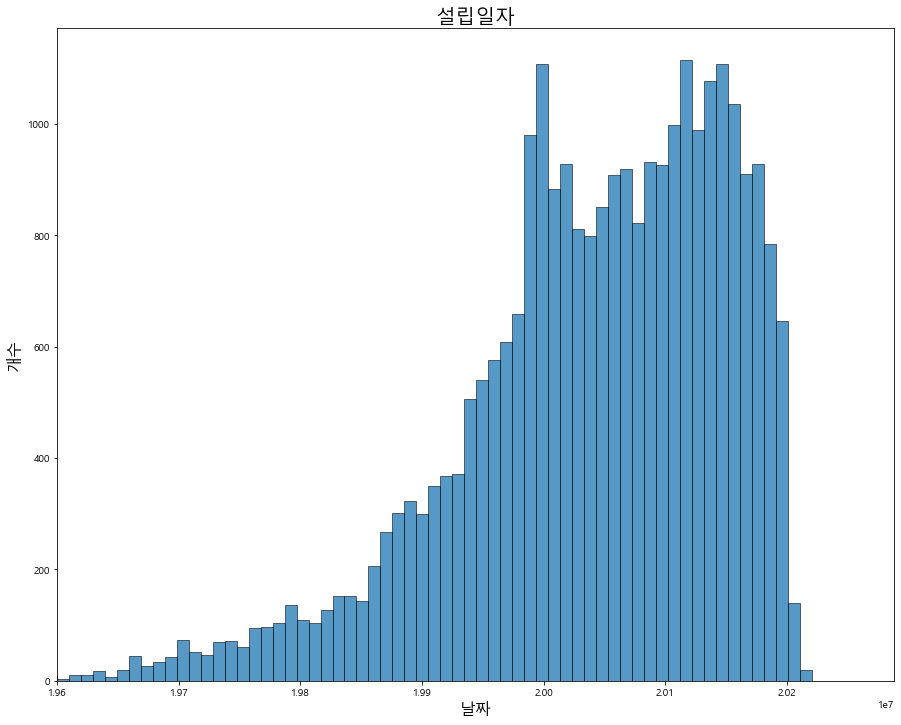

In [25]:
plt.figure(figsize=(15,12))
sns.histplot(data = df_active,x='설립일자')
plt.title('설립일자', fontsize=20)
plt.xlabel('날짜', fontsize=16)
plt.ylabel('개수', fontsize=16)
plt.xlim(19600000)
#save_fig("업종_countplot_drop(M)")
plt.show()

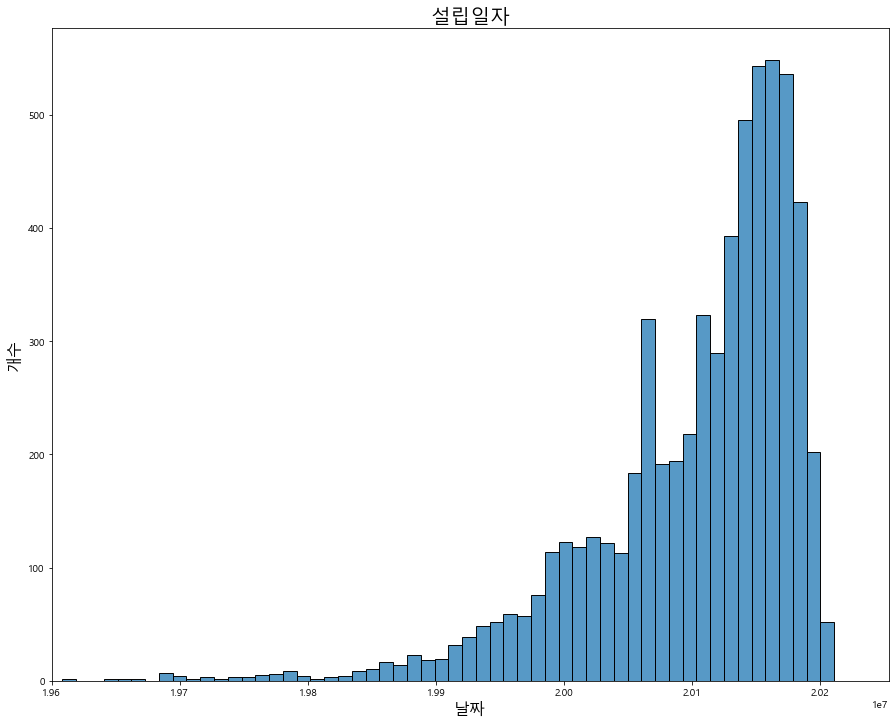

In [26]:
plt.figure(figsize=(15,12))
sns.histplot(data = df_down,x='설립일자')
plt.title('설립일자', fontsize=20)
plt.xlabel('날짜', fontsize=16)
plt.ylabel('개수', fontsize=16)
plt.xlim(19600000)
#save_fig("업종_countplot_drop(M)")
plt.show()

위의 두 그래프를 비교했을떄 비교적 최근에 생긴 기업들이 휴폐업이 많은 것을 확인

### 설립일자

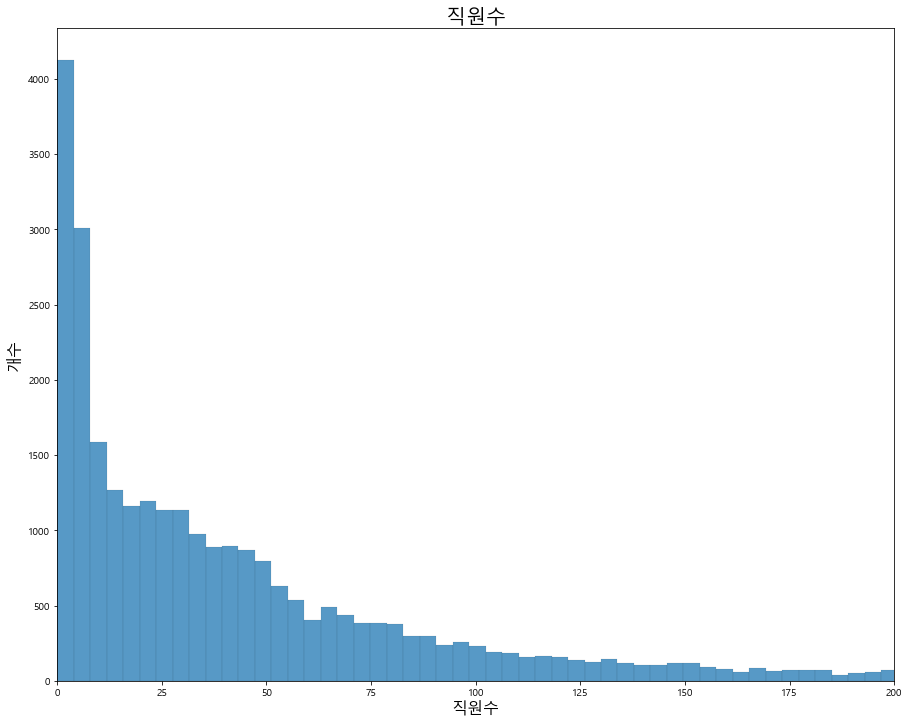

In [27]:
plt.figure(figsize=(15,12))
sns.histplot(data = df_active, x='직원수')
plt.title('직원수', fontsize=20)
plt.xlabel('직원수', fontsize=16)
plt.ylabel('개수', fontsize=16)
plt.xlim(0,200)
#save_fig("업종_countplot_drop(M)")
plt.show()

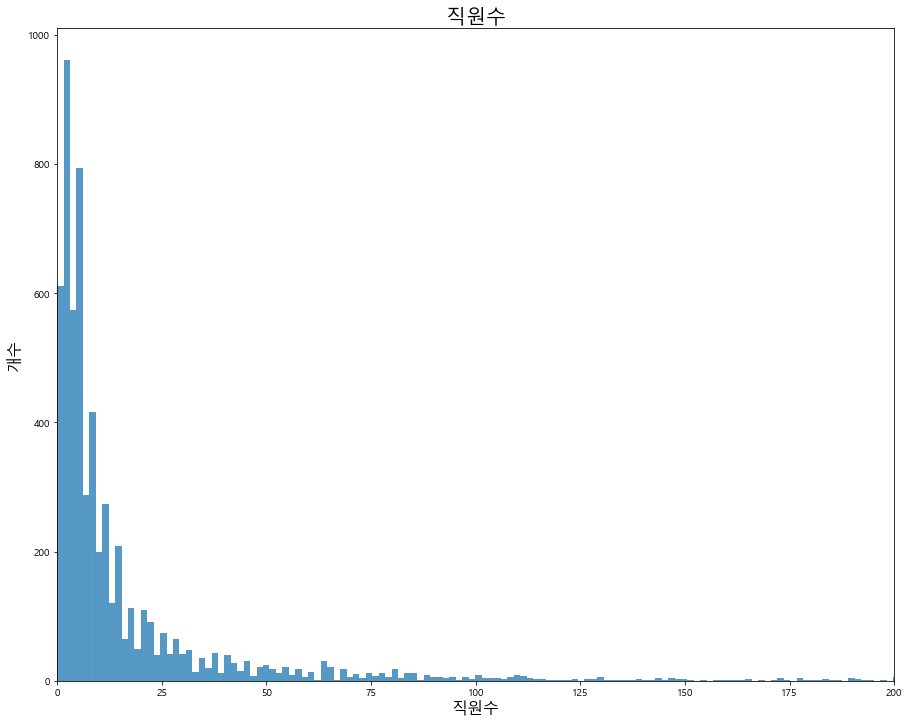

In [28]:
plt.figure(figsize=(15,12))
sns.histplot(data = df_down, x='직원수')
plt.title('직원수', fontsize=20)
plt.xlabel('직원수', fontsize=16)
plt.ylabel('개수', fontsize=16)
plt.xlim(0,200)
#save_fig("업종_countplot_drop(M)")
plt.show()

확실히 직원수가 적은 기업이 많은 것을 확인할 수 있다.

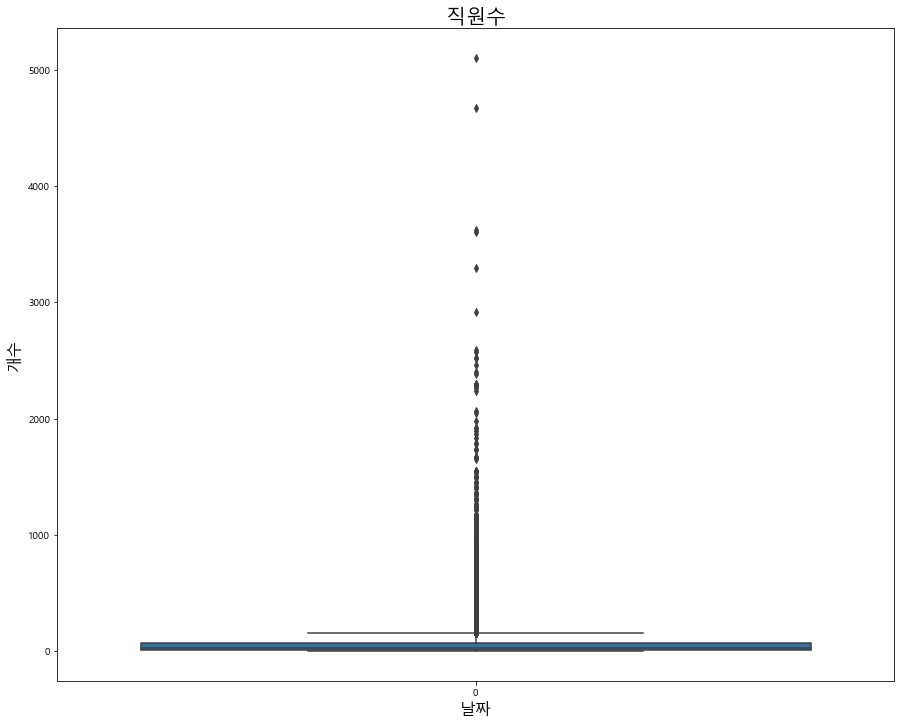

In [29]:
plt.figure(figsize=(15,12))
sns.boxplot(data = df_active['직원수'])
plt.title('직원수', fontsize=20)
plt.xlabel('날짜', fontsize=16)
plt.ylabel('개수', fontsize=16)
#save_fig("업종_countplot_drop(M)")
plt.show()

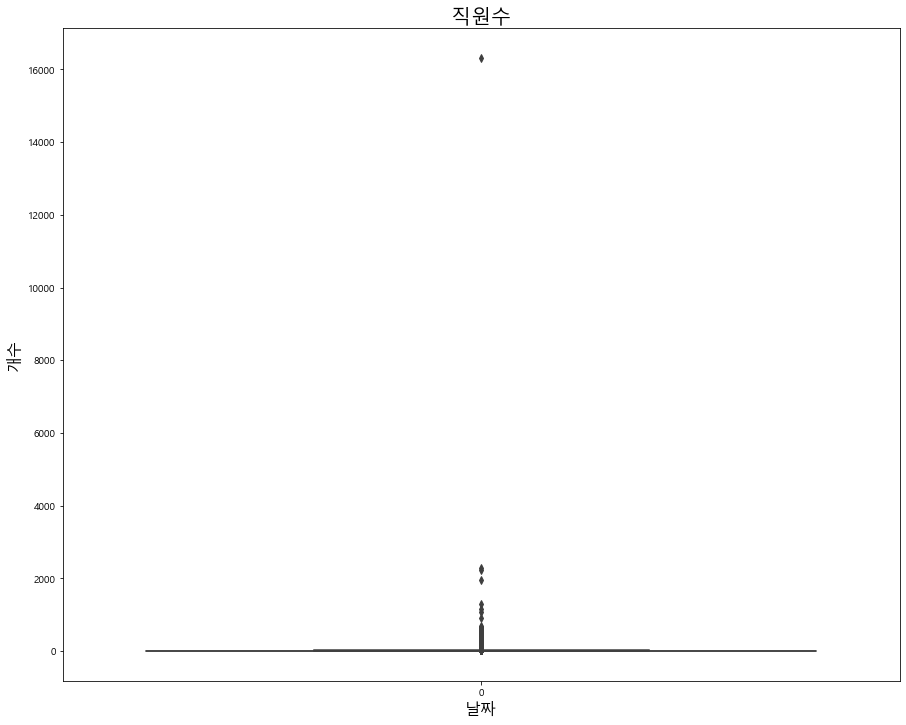

In [30]:
plt.figure(figsize=(15,12))
sns.boxplot(data = df_down['직원수'])
plt.title('직원수', fontsize=20)
plt.xlabel('날짜', fontsize=16)
plt.ylabel('개수', fontsize=16)
#save_fig("업종_countplot_drop(M)")
plt.show()

데이터에 이상치가 있는 듯

In [31]:
col_list = ['사업자등록번호', '기업접두명', '기업명', '기업접미명', '기업영문명', '업종', '공기업구분', '본점지점구분', '국외투자법인여부', '벤처기업여부', '상장코드', '산업코드1','산업코드2', '산업코드3' , '공공기관유형', '중견기업보호여부', '본점기업코드', '설립일자', '설립구분', '상장일자', '주요사업내용', '국가명', '홈페이지URL', '대표자명', '직원수']

In [32]:
for i in col_list:
    print(df_active[i].value_counts())
    print('/////////')

8398700544    1
1438102115    1
1448131234    1
1388159649    1
1208658794    1
             ..
1438117239    1
1018628789    1
3068118386    1
7128800625    1
1138165759    1
Name: 사업자등록번호, Length: 28982, dtype: int64
/////////
(주)    18458
(유)      121
(자)        1
Name: 기업접두명, dtype: int64
/////////
주택관리공단         10
소모에너지엔테크놀러지     9
한국체인모터          7
신흥              7
메인텍             6
               ..
코웰정밀            1
선승연             1
코너스톤그룹          1
썬폴리폼            1
프리미엄원희캐슬        1
Name: 기업명, Length: 27359, dtype: int64
/////////
(주)    8916
(유)     253
Name: 기업접미명, dtype: int64
/////////
Korea Housing Management Co.,Ltd.        167
Samil Appraisal Corporation Co., Ltd.     11
Dai Sung Oil Co, Ltd                       9
SOMO ENERGY AND TECHNOLOGY Co., Ltd.       9
Dongbang Oil Co, Ltd                       9
                                        ... 
SUNG HO TECHNICAL SOLUTION Co., Ltd        1
SC.Min Innovation Co., Ltd.                1
KCC Co., Ltd.                

In [33]:
col_list = ['업종', '공기업구분', '본점지점구분', '국외투자법인여부', '벤처기업여부', '상장코드', '산업코드1','산업코드2', '산업코드3', '공공기관유형', '중견기업보호여부', '본점기업코드', '설립일자', '설립구분', '상장일자', '주요사업내용', '국가명', '홈페이지URL', '대표자명', '직원수']


In [34]:
df_down = pd.read_excel(r'C:\Users\yoon9\Desktop\3-2\Numble\넘블 챌린지 데이터\휴폐업 중소법인 재무보유.xlsx')

In [35]:
df_down = df_down.rename(columns= {'BIZ_NO':'사업자등록번호', 'CMP_PFIX_NM':'기업접두명', 'CMP_NM':'기업명', 'CMP_SFIX_NM':'기업접미명', 'CMP_ENM':'기업영문명', 'BZ_TYP':'업종','CMP_SCL':'기업규모', 'PBCO_GB':'공기업구분',
                           'PSN_CORP_GB':'개인법인구분', 'HDOF_BR_GB':'본점지점구분', 'FR_IVST_CORP_YN':'국외투자법인여부', 'VENT_YN':'벤처기업여부', 'LIST_CD':'상장코드', 'IND_CD_ORDR':'산업코드차수', 'IND_CD1':'산업코드1', 'IND_CD2':'산업코드2', 'IND_CD3':'산업코드3','PB_ORG_TYP':'공공기관유형', 'MDSCO_PRTC_YN':'중견기업보호여부', 'HDOF_CMP_CD':'본점기업코드', 'ESTB_DATE':'설립일자', 'ESTB_GB':'설립구분', 'LIST_DATE':'상장일자', 'MN_BIZ_CONT':'주요사업내용', 'NATN_NM':'국가명', 'HOMEPAGE_URL':'홈페이지URL', 'CEO_NM':'대표자명','EMP_CNT':'직원수'})

# 통합데이터 확인

In [12]:
df

,사업자등록번호,기업명,공기업구분,개인법인구분,본점지점구분,국외투자법인여부,벤처기업여부,상장코드,산업코드1,공공기관유형,중견기업보호여부,본점기업코드,설립일자,설립구분,국가명,직원수,폐업여부,산업코드 대분류
0,1138111739,한일가스산업,2,1,1,0,0,0,47,0,0,0,1966-04-19,1,0,43.0,0,도매 및 소매업
1,2078132193,엠피아이,2,1,1,0,0,0,15,0,0,0,1991-08-06,1,0,35.0,0,제조업
2,1318167565,도영운수,2,1,1,0,0,0,49,0,0,0,2001-10-30,1,0,149.0,0,운수 및 창고업
3,5048128251,중원산업,2,1,1,0,0,0,30,0,0,0,1999-01-12,1,0,75.0,0,제조업
4,1098164260,카타나골프,2,1,1,0,0,0,46,0,0,0,2000-05-31,1,0,3.0,0,도매 및 소매업
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35716,4808501629,게방식당팩토리,2,1,2,0,0,0,10,0,0,1,2018-01-26,1,0,0.0,1,제조업
35717,8018501578,우진푸드중부지점,2,1,2,0,0,0,10,0,0,1,2020-07-27,1,0,22.0,1,제조업
35718,4118523419,윤월드푸드코리아다크써클브로스,2,1,2,0,0,0,56,0,0,1,2019-09-26,1,0,0.0,1,숙박 및 음식점업
35719,1738102533,기린테크,2,1,1,0,0,0,58,0,0,0,2021-10-25,1,0,0.0,1,정보통신업


,BIZ_NO,CMP_PFIX_NM,CMP_NM,CMP_NM1,CMP_SFIX_NM,CMP_ENM,BZ_TYP,CMP_TYP,CMP_SCL,PBCO_GB,...,TAXN_TYP,HDOF_CMP_CD,ESTB_DATE,ESTB_GB,LIST_DATE,MN_BIZ_CONT,NATN_NM,HOMEPAGE_URL,CEO_NM,EMP_CNT
0,2218116923,NaN,NaN,신우종합건설,(주),"Shinu General Construction Co., Ltd.",M,4,2,2,...,3.0,NaN,20000807.0,1.0,NaN,토목공사업,NaN,NaN,김주대외 1명,12.0
1,1138111739,NaN,한일가스산업(주),한일가스산업,(주),"HANIL GAS IND. CO.,LTD.",M,3,2,2,...,3.0,NaN,19660419.0,1.0,NaN,LP Gas 충전 및 판매업,NaN,www.hanilgas.com,홍순철외 1명,43.0
2,1108146490,(주),NaN,랩솔루션,NaN,Lab Solution,M,4,2,2,...,3.0,NaN,20000612.0,1.0,NaN,기체분석기 등,NaN,www.lab-solution.com,김봉철,3.0
3,3128134737,(주),NaN,고려인삼제품공사,NaN,"KOREAN GINSENG PRODUCT CO., LTD",M,4,2,2,...,3.0,NaN,19920301.0,1.0,NaN,"다류, 차, 인삼제품, 음료, 코코아가공품, 커피",NaN,www.kitea.co.kr,박경출,24.0
4,2078132193,(주),(주)엠피아이,엠피아이,NaN,"EMPIALEE CO.,LTD.",M,3,2,2,...,3.0,NaN,19910806.0,1.0,NaN,가죽 및 대용가죽제품 제조업,NaN,www.mastercnd.co.kr,이스테판상수외 1명,35.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198646,6208701973,(주),NaN,동화피앤피,NaN,"Donghwa P&P Co., Ltd.",M,4,2,2,...,3.0,NaN,20200925.0,1.0,NaN,"인쇄, 지함, 코팅, 디자인",NaN,NaN,홍종오,NaN
198647,3688702720,NaN,NaN,중앙종합조경,(주),NaN,M,4,2,2,...,3.0,NaN,20220721.0,1.0,NaN,"조경공사, 토목공사",NaN,NaN,서영희,13.0
198648,4868602701,(주),NaN,세움웹,NaN,NaN,M,5,2,2,...,3.0,NaN,20220801.0,1.0,NaN,"소프트웨어 자문, 개발 및 공급업",NaN,NaN,이대홍,NaN
198649,2528101633,(주),NaN,에프에이앤컴퍼니,NaN,"fa & company, inc.",M,4,2,2,...,NaN,NaN,20200106.0,1.0,NaN,UX디자인 및 프로그래밍,NaN,NaN,이해성,NaN


In [11]:
df_act_info

,BIZ_NO,CMP_PFIX_NM,CMP_NM,CMP_NM1,CMP_SFIX_NM,CMP_ENM,BZ_TYP,CMP_TYP,CMP_SCL,PBCO_GB,...,TAXN_TYP,HDOF_CMP_CD,ESTB_DATE,ESTB_GB,LIST_DATE,MN_BIZ_CONT,NATN_NM,HOMEPAGE_URL,CEO_NM,EMP_CNT
0,2218116923,NaN,NaN,신우종합건설,(주),"Shinu General Construction Co., Ltd.",M,4,2,2,...,3.0,NaN,20000807.0,1.0,NaN,토목공사업,NaN,NaN,김주대외 1명,12.0
1,1138111739,NaN,한일가스산업(주),한일가스산업,(주),"HANIL GAS IND. CO.,LTD.",M,3,2,2,...,3.0,NaN,19660419.0,1.0,NaN,LP Gas 충전 및 판매업,NaN,www.hanilgas.com,홍순철외 1명,43.0
2,1108146490,(주),NaN,랩솔루션,NaN,Lab Solution,M,4,2,2,...,3.0,NaN,20000612.0,1.0,NaN,기체분석기 등,NaN,www.lab-solution.com,김봉철,3.0
3,3128134737,(주),NaN,고려인삼제품공사,NaN,"KOREAN GINSENG PRODUCT CO., LTD",M,4,2,2,...,3.0,NaN,19920301.0,1.0,NaN,"다류, 차, 인삼제품, 음료, 코코아가공품, 커피",NaN,www.kitea.co.kr,박경출,24.0
4,2078132193,(주),(주)엠피아이,엠피아이,NaN,"EMPIALEE CO.,LTD.",M,3,2,2,...,3.0,NaN,19910806.0,1.0,NaN,가죽 및 대용가죽제품 제조업,NaN,www.mastercnd.co.kr,이스테판상수외 1명,35.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198646,6208701973,(주),NaN,동화피앤피,NaN,"Donghwa P&P Co., Ltd.",M,4,2,2,...,3.0,NaN,20200925.0,1.0,NaN,"인쇄, 지함, 코팅, 디자인",NaN,NaN,홍종오,NaN
198647,3688702720,NaN,NaN,중앙종합조경,(주),NaN,M,4,2,2,...,3.0,NaN,20220721.0,1.0,NaN,"조경공사, 토목공사",NaN,NaN,서영희,13.0
198648,4868602701,(주),NaN,세움웹,NaN,NaN,M,5,2,2,...,3.0,NaN,20220801.0,1.0,NaN,"소프트웨어 자문, 개발 및 공급업",NaN,NaN,이대홍,NaN
198649,2528101633,(주),NaN,에프에이앤컴퍼니,NaN,"fa & company, inc.",M,4,2,2,...,NaN,NaN,20200106.0,1.0,NaN,UX디자인 및 프로그래밍,NaN,NaN,이해성,NaN


In [57]:
df_manufacture_code = list(map(str,np.arange(10,35)))
df_manufacture_code

['10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '20',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '28',
 '29',
 '30',
 '31',
 '32',
 '33',
 '34']

In [58]:
#df_manufacture = \

for code in df_manufacture_code:
    df_active[df_active['산업코드1'].str.startswith('code')]

KeyError: "None of [Float64Index([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,\n              ...\n              nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],\n             dtype='float64', length=28982)] are in the [columns]"

In [11]:
df_active

,사업자등록번호,기업접두명,기업명,기업접미명,기업영문명,업종,기업규모,공기업구분,개인법인구분,본점지점구분,...,중견기업보호여부,본점기업코드,설립일자,설립구분,상장일자,주요사업내용,국가명,홈페이지URL,대표자명,직원수
0,1138111739,NaN,한일가스산업,(주),"HANIL GAS IND. CO.,LTD.",M,2,2,1,1,...,N,NaN,19660419.0,1,NaN,LP Gas 충전 및 판매업,NaN,www.hanilgas.com,홍순철외 1명,43.0
1,2078132193,(주),엠피아이,NaN,"EMPIALEE CO.,LTD.",M,2,2,1,1,...,N,NaN,19910806.0,1,NaN,가죽 및 대용가죽제품 제조업,NaN,www.mastercnd.co.kr,이스테판상수외 1명,35.0
2,1318167565,NaN,도영운수,(주),"DOYOUNG TRANSPORTATION CO.,LTD.",M,2,2,1,1,...,N,NaN,20011030.0,1,NaN,시내버스업,NaN,transport@naver.com,김명화,149.0
3,5048128251,(주),중원산업,NaN,"JOONGWON INDUSTRIAL CO.,LTD.",M,2,2,1,1,...,N,NaN,19990112.0,1,NaN,자동차 부품 제조,NaN,www.koreajw.com,김명구,75.0
4,1098164260,(주),카타나골프,NaN,"CATANA GOLF CO.,LTD.",M,2,2,1,1,...,N,NaN,20000531.0,1,NaN,골프용품 전반의 제조 및 수출업,NaN,NaN,김홍득,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28977,8048101453,NaN,제이앤인베스트먼트,NaN,J&INVESTMENT,M,2,2,1,1,...,N,NaN,20191206.0,1,NaN,경영컨설팅업,NaN,NaN,정경태,0.0
28978,8028701430,NaN,디앤엠개발,(주),"DNM Development Co., Ltd.",M,2,2,1,1,...,N,NaN,20200402.0,1,NaN,비주거용 건물 임대업,NaN,NaN,송성현,1.0
28979,4268501421,NaN,마스비 건축연구소,NaN,NaN,M,2,2,1,2,...,N,1220726.0,19900108.0,1,NaN,"BIM용역, 엔지니어링컨설팅",NaN,NaN,김태남,81.0
28980,6518502462,(주),건설레미콘의정부공장,NaN,"Construction Remicon Uijeongbu Factory Co., Ltd.",M,2,2,1,2,...,N,1583116.0,20220615.0,1,NaN,레미콘,NaN,NaN,이미성,26.0


In [12]:
test = pd.read_csv(r'C:\Users\yoon9\PycharmProjects\Sejong_Project\Numble\data\넘블 챌린지 데이터 (1)\통합데이터\act_corp_finance_merge.csv',encoding = 'cp949')

C:\Users\yoon9\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


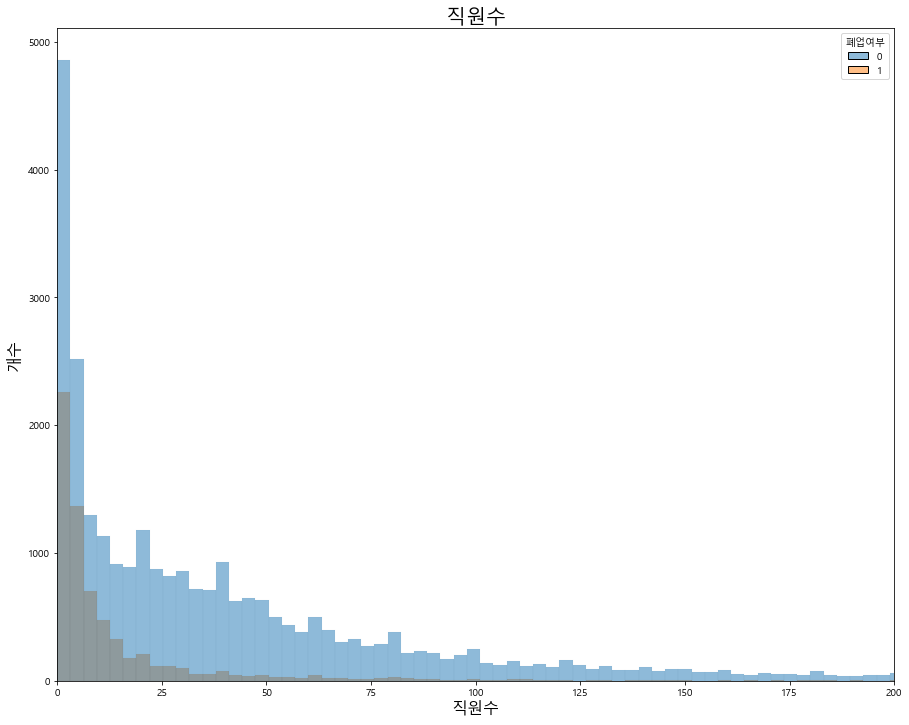

In [11]:
plt.figure(figsize=(15,12))
sns.histplot(data = df, x='직원수',hue='폐업여부')
plt.title('직원수', fontsize=20)
plt.xlabel('직원수', fontsize=16)
plt.ylabel('개수', fontsize=16)
plt.xlim(0,200)
#save_fig("업종_countplot_drop(M)")
plt.show()